# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

2.1

<AxesSubplot:xlabel='Year'>

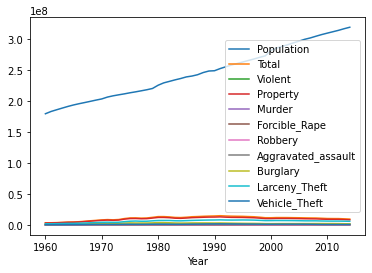

In [31]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1960 to 2014
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Population          55 non-null     int64
 1   Total               55 non-null     int64
 2   Violent             55 non-null     int64
 3   Property            55 non-null     int64
 4   Murder              55 non-null     int64
 5   Forcible_Rape       55 non-null     int64
 6   Robbery             55 non-null     int64
 7   Aggravated_assault  55 non-null     int64
 8   Burglary            55 non-null     int64
 9   Larceny_Theft       55 non-null     int64
 10  Vehicle_Theft       55 non-null     int64
dtypes: int64(11)
memory usage: 5.2 KB


2.2

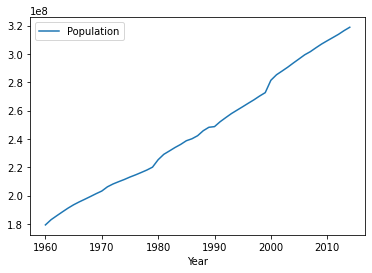

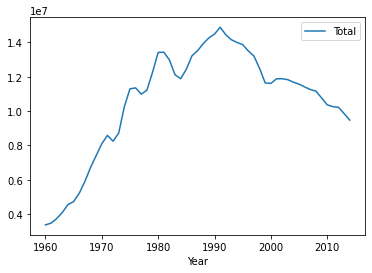

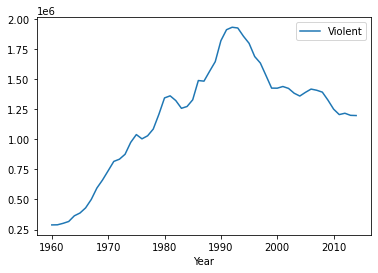

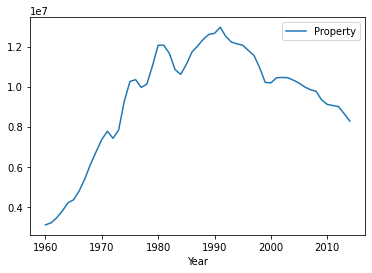

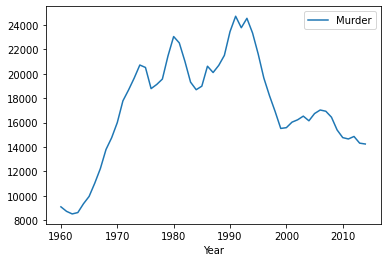

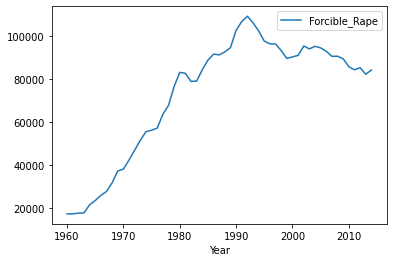

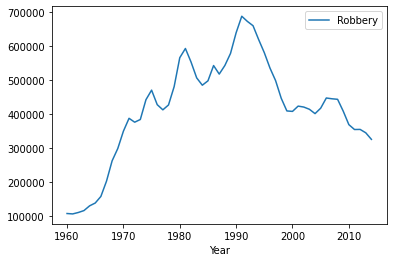

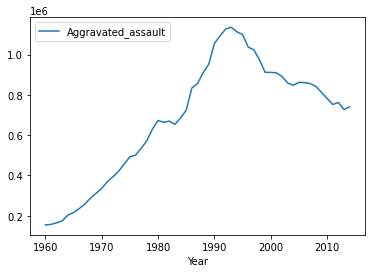

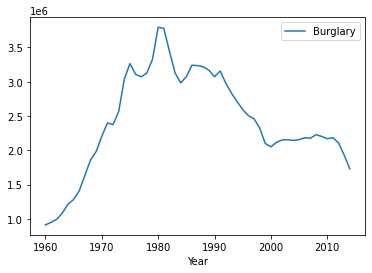

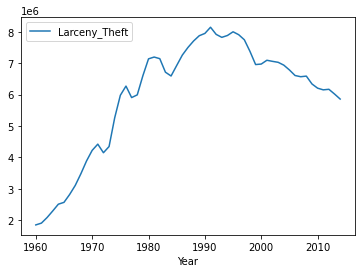

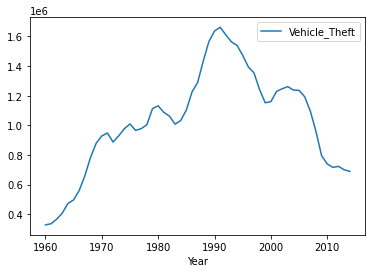

In [33]:
for i in df.columns:
    df.plot(y= i)

3.

<AxesSubplot:xlabel='Year'>

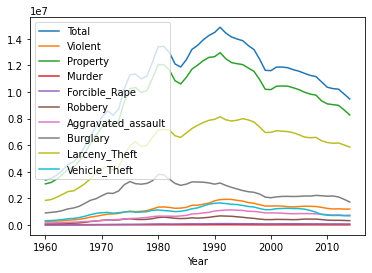

In [34]:
df.drop('Population', axis= 1).plot()

In [35]:
df.drop(df[['Population', 'Total']], axis= 1, inplace = True)

<AxesSubplot:>

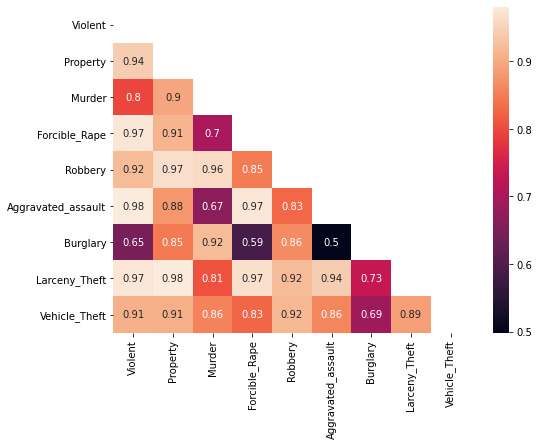

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(8,6))


sns.heatmap(df.corr(), annot=True, mask = np.triu(df.corr()))

Correlacionan más altamente Vehicle_Theft, Larceny_Theft, Burglary, Robbery y Violent.

4. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [39]:
X = np.array(df[['Vehicle_Theft', 'Larceny_Theft', 'Burglary', 'Robbery' ,'Violent']])
y = np.array(df['Murder'])

In [40]:
########## Sin validación cruzada #####################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
poli = PolynomialFeatures(6) 
X_poly = poli.fit_transform(X_train,y_train)
lr = LinearRegression()

lr.fit(X_poly, y_train)
y_pred = lr.predict(X_poly)

print("Score:", r2_score(y_train, y_pred)*100, "% ")

Score: 100.0 % 


In [ ]:
#Sigo sin comprender como llevar a cabo la validación cruzada